<a href="https://www.kaggle.com/code/mh0386/digit-recognizer?scriptVersionId=146137528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
try:
    train = pd.read_csv('Data/train.csv')
    test = pd.read_csv('Data/test.csv')
except:
    train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
    test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = np.array(test)

In [6]:
y = train['label']
X = train.drop('label', axis=1)

In [7]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
test.dtype

dtype('int64')

In [10]:
X = X/255
test = test/255

In [11]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X = np.array(X)

In [13]:
X = X.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

In [14]:
X.shape

(42000, 28, 28, 1)

In [15]:
test.dtype

dtype('float64')

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = tf.keras.Sequential(
    [
        Conv2D(64, kernel_size=(3, 3), activation=tf.nn.relu),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation=tf.nn.relu),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(3, 3), activation=tf.nn.relu),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation=tf.nn.relu),
        Dense(256, activation=tf.nn.relu),
        Dense(128, activation=tf.nn.relu),
        Dense(10, activation=tf.nn.softmax)
    ]
)

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
h = model.fit(
    X, 
    y, 
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
1050/1050 [==============================] - 47s 41ms/step - loss: 0.3653 - accuracy: 0.8802 - val_loss: 0.1782 - val_accuracy: 0.9465
Epoch 2/50
1050/1050 [==============================] - 41s 39ms/step - loss: 0.1320 - accuracy: 0.9580 - val_loss: 0.0878 - val_accuracy: 0.9711
Epoch 3/50
1050/1050 [==============================] - 39s 37ms/step - loss: 0.0961 - accuracy: 0.9697 - val_loss: 0.1043 - val_accuracy: 0.9668
Epoch 4/50
1050/1050 [==============================] - 38s 36ms/step - loss: 0.0829 - accuracy: 0.9743 - val_loss: 0.0771 - val_accuracy: 0.9751
Epoch 5/50
1050/1050 [==============================] - 40s 38ms/step - loss: 0.0722 - accuracy: 0.9772 - val_loss: 0.0729 - val_accuracy: 0.9782
Epoch 6/50
1050/1050 [==============================] - 38s 36ms/step - loss: 0.0618 - accuracy: 0.9810 - val_loss: 0.0835 - val_accuracy: 0.9757
Epoch 7/50
1050/1050 [==============================] - 38s 36ms/step - loss: 0.0551 - accuracy: 0.9832 - val_loss: 0.0880 -

In [19]:
y_pred = model.predict(test)
y_pred

875/875 [==============================] - 9s 10ms/step


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        5.4105176e-34, 0.0000000e+00],
       [1.0000000e+00, 1.8049835e-26, 1.9253145e-17, ..., 2.8618788e-17,
        4.0918602e-24, 2.3033154e-17],
       [1.6169422e-16, 1.1495835e-24, 1.5386563e-20, ..., 1.2638978e-13,
        1.3318467e-10, 1.0000000e+00],
       ...,
       [0.0000000e+00, 5.1046456e-35, 1.9592728e-22, ..., 1.1009120e-28,
        6.4161552e-28, 5.1947730e-35],
       [1.7460520e-16, 2.1693190e-24, 7.6957502e-23, ..., 1.6714020e-14,
        4.1087541e-12, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0095297e-35,
        1.7147483e-27, 0.0000000e+00]], dtype=float32)

In [20]:
y_pred = np.argmax(y_pred, axis=1)
y_pred = y_pred.astype('float64')
y_pred

array([2., 0., 9., ..., 3., 9., 2.])

In [21]:
model.evaluate(test, y_pred)

875/875 [==============================] - 9s 10ms/step - loss: 0.0080 - accuracy: 1.0000


[0.007974624633789062, 1.0]

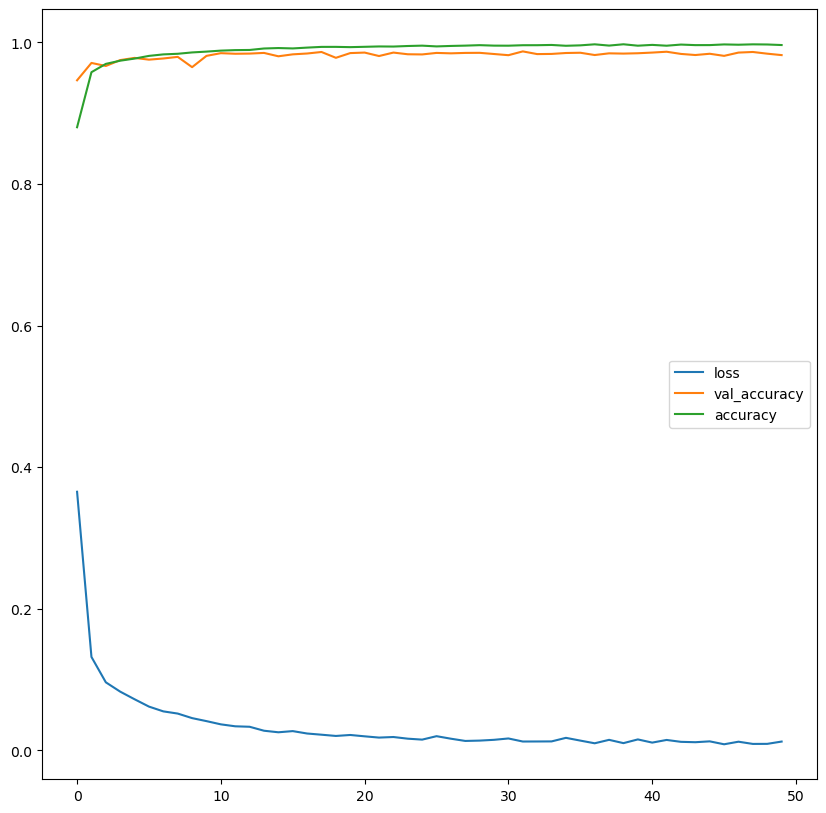

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(h.history['loss'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['accuracy'])
plt.legend(['loss', 'val_accuracy', 'accuracy'])
plt.show()

In [23]:
submission = pd.DataFrame(
    {
        'ImageId': range(1, len(y_pred) + 1),
        'Label': y_pred
    }
)
submission.to_csv('submission.csv', index=False)

In [24]:
model.save('Model/model.h5')

C:\Users\moham\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
